In [10]:
import pandas as pd
df = pd.read_csv("Iris.csv")

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
df.shape

(150, 6)

In [19]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [47]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [21]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# data visualization

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

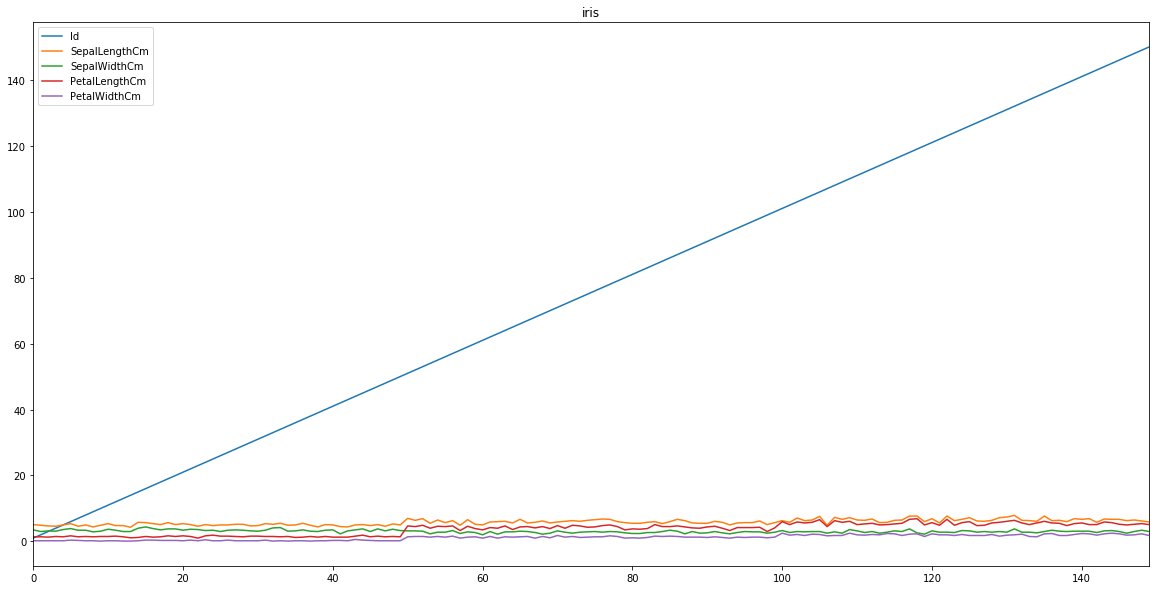

In [26]:
algo=df.plot(figsize=(20,10),title='iris')


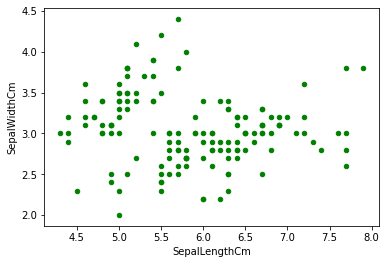

In [27]:
df.plot.scatter('SepalLengthCm','SepalWidthCm',color='green')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


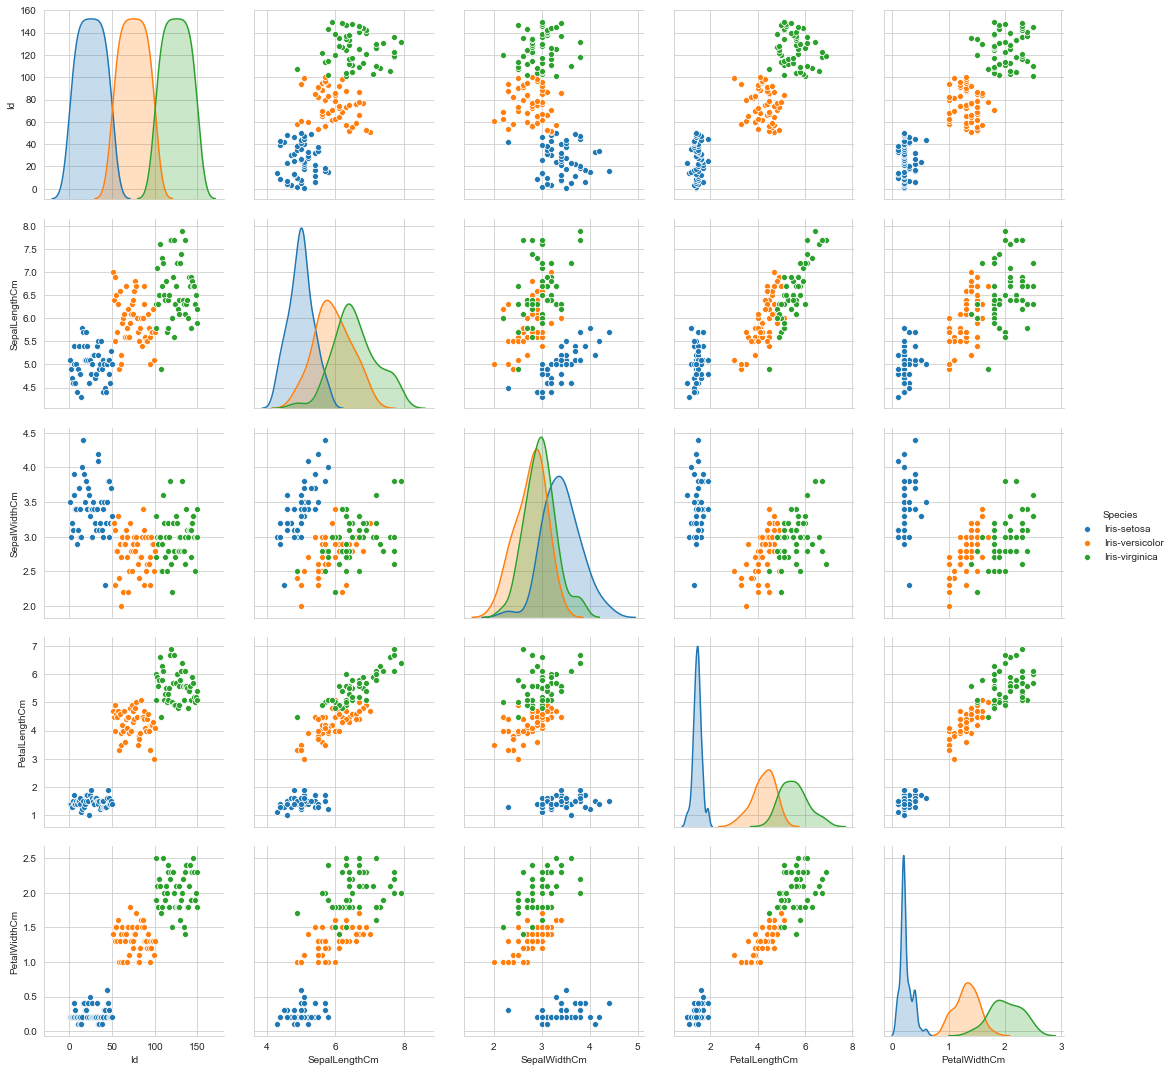

In [28]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(df,hue ='Species',size=3)


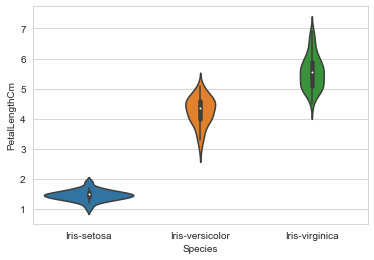

In [29]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df,size= 5)

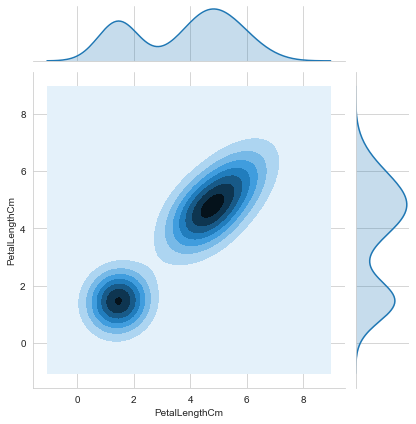

In [30]:
sns.jointplot(x='PetalLengthCm',y='PetalLengthCm',data =df,kind='kde')

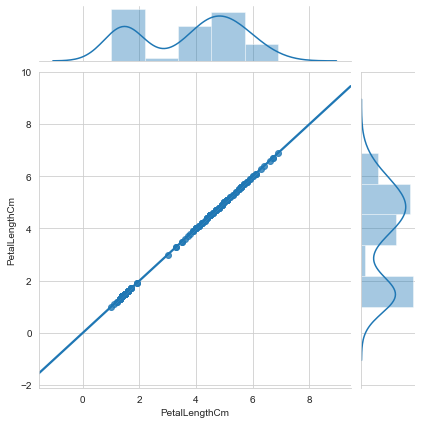

In [31]:
sns.jointplot(x='PetalLengthCm',y='PetalLengthCm',data=df,kind='reg')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


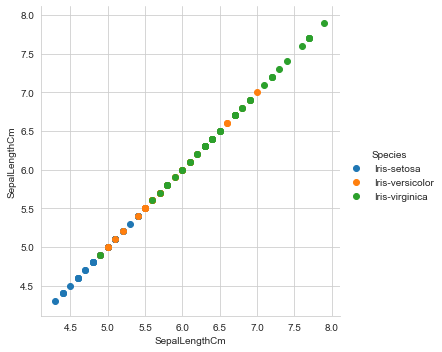

In [32]:
sns.FacetGrid(df,hue ='Species',size=5).map(plt.scatter,'SepalLengthCm','SepalLengthCm').add_legend()

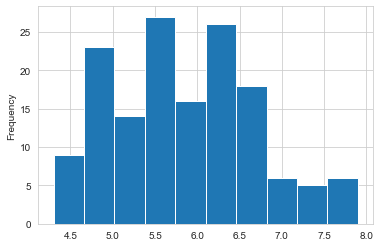

In [33]:
df['SepalLengthCm'].plot.hist()

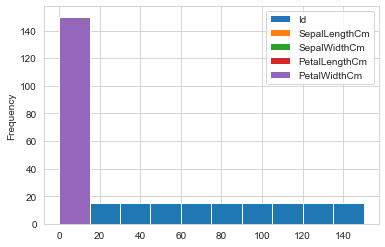

In [34]:
df.plot.hist()

In [36]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

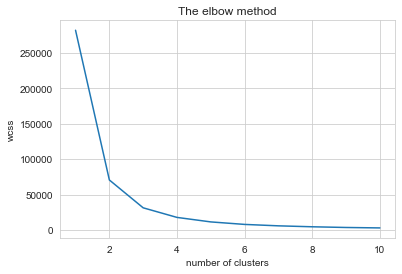

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

# to determine the value of k,the number of cluster through elbow methods .
when k increases ,the  centroids  are closer to the cluster centroids.the improvements will decline at some point rapidly ,
creating the elbow shape .so here the optimal number numbers of clusters are 3

In [39]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [40]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


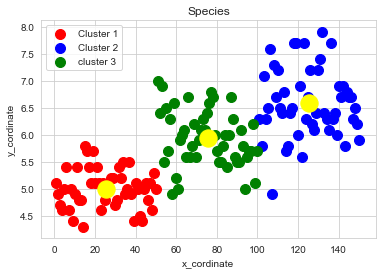

In [41]:
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],s= 100, c='red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],s= 100, c='blue',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2, 1],s = 100, c='green',label ='cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s= 300,c= 'yellow')
plt.title('Species')
plt.xlabel('x_cordinate')
plt.ylabel('y_cordinate')
plt.legend()
plt.show()